In [ ]:
import pymc as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
az.style.use('arviz-darkgrid')

path = "i210450 - fish.csv"

# Load the data
data = pd.read_csv(path)

In [ ]:
# Extract the data
height_data = data['Height'].values
width_data = data['Width'].values

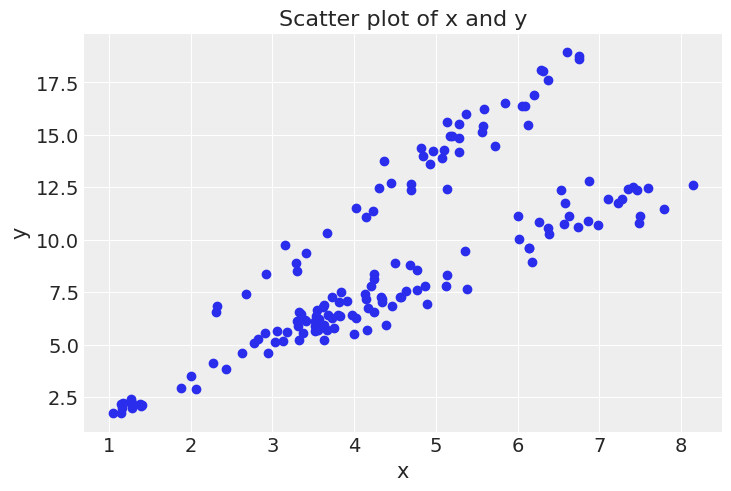

In [ ]:
def scatter_plot(x, y):
    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Scatter plot of x and y')
    plt.show()

scatter_plot(width_data, height_data)

In [11]:
with pm.Model() as fish_lin:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=10)
    ϵ = pm.HalfNormal('ϵ', 5)

    μ = α + β * width_data

    y_pred = pm.Normal('y_pred', mu=μ, sigma=ϵ, observed=height_data)

    idata_x1 = pm.sample(2000, idata_kwargs={'log_likelihood': True})

with pm.Model() as fish_poly:
    α = pm.Normal('α', mu=0, sigma=10)
    β1 = pm.Normal('β1', mu=0, sigma=10)
    β2 = pm.Normal('β2', mu=0, sigma=10)
    ϵ = pm.HalfNormal('ϵ', 5)

    μ = α + β1 * width_data + β2 * (width_data*width_data)

    y_pred2 = pm.Normal('y_pred2', mu=μ, sigma=ϵ, observed=height_data)

    idata_x2 = pm.sample(2000, idata_kwargs={'log_likelihood': True})

In [15]:
cmp_df = az.compare({'fish_lin': idata_x1, 'fish_poly': idata_x2}, method='BB-pseudo-BMA', ic="loo", scale="deviance")
cmp_df

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
fish_poly,0,752.775190,3.107007,0.000000,0.924539,14.484858,0.000000,False,deviance
fish_lin,1,761.428788,2.697200,8.653598,0.075461,14.126241,4.886516,False,deviance


In [16]:
cmp_df = az.compare({'fish_lin':idata_x1, 'fish_poly':idata_x2},method='BB-pseudo-BMA', ic="waic", scale="deviance")
cmp_df

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
fish_poly,0,752.758866,3.098845,0.000000,0.917188,14.068713,0.000000,False,deviance
fish_lin,1,761.412351,2.688981,8.653485,0.082812,13.865728,4.887448,False,deviance


Q1) Based on the above tables, it appears the linear model has better predictive accuracy when compared to the polynomial model, as fish_poly has a lower elpd_loo and elpd_waic score.

Q2) The polynomial model is more complex, not only because it is polynomial, but also because it has a higher weight, which is usually associated with more complex models. Furthermore, the p_loo and p_waic values of fish_poly are higher which also indicates that it is more complex.